In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection 
import train_test_split, learning_curve


In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
df.loc[(df['isFraud']==1) & (df['newbalanceOrig']!=0.0)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4440,4,TRANSFER,10000000.00,C7162498,12930418.44,2930418.44,C945327594,0.00,0.00,1,0
60853,9,TRANSFER,994453.20,C1121789613,1437370.87,442917.67,C254839817,194812.76,665743.67,1,0
377151,17,CASH_OUT,42062.82,C897869440,340830.43,298767.61,C616721459,398931.35,678419.64,1,0
481250,19,TRANSFER,10000000.00,C416779475,11861008.32,1861008.32,C380259496,0.00,0.00,1,0
586311,33,TRANSFER,10000000.00,C1439740840,19887819.06,9887819.06,C875288652,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362576,741,TRANSFER,10000000.00,C780743034,45674547.89,35674547.89,C491519946,0.00,0.00,1,0
6362578,741,TRANSFER,10000000.00,C1111699947,35674547.89,25674547.89,C949015157,0.00,0.00,1,0
6362580,741,TRANSFER,10000000.00,C88849251,25674547.89,15674547.89,C1939028448,0.00,0.00,1,0
6362582,741,TRANSFER,10000000.00,C1945606464,15674547.89,5674547.89,C625944676,0.00,0.00,1,0


In [5]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [6]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,n_estimators=150, oob_score=True)

In [7]:
X.drop(['nameOrig','nameDest', 'isFlaggedFraud'], axis = 1, inplace=True)


C:\Users\DELL\AppData\Local\Temp\ipykernel_20852\2119866149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['nameOrig','nameDest', 'isFlaggedFraud'], axis = 1, inplace=True)


In [8]:
Y = X['isFraud']
X.drop(['isFraud'], axis =1, inplace =True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20852\3652526519.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['isFraud'], axis =1, inplace =True)


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
X['type'] = le.fit_transform(X['type'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_20852\1690374543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['type'] = le.fit_transform(X['type'])


### 1.Data cleaning including missing values, outliers and multi-collinearity:



In [29]:
df.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

* There are no null values is dataset.

### 2. Describe your fraud detection model in elaboration.

This Fraud Detection Model is built using Random forest Classifier.

The parameters are set to:
*   random_state=42. 
*  n_jobs=-1. 
*   max_depth=5.
*  n_estimators=150. 
*   oob_score=True.
   
The score of the model is : 0.9989

Here, while training the model, the following columns were dropped/removed as they were found to be insignificant and did not cause any information loss on removal:
*    isFlaggedFraud.
*   nameOrig.
*   nameDest.
    
Alternatives that could be used instead of Random Forest Classifier:
*    AdaBoost Classifier
*   XGBoost Classifier
*    Gradient Descent Classifier
    
80% of the entire dataset was used to train the model and rest was used for testing. 

### 3. How did you select variables to be included in the model?

In [11]:
df[(df['isFlaggedFraud']==1) & (df['type']== 'CASH_OUT')].any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

* there is not even a single instance for which 'isFlaggedFraud' is set TRUE for any 'cash out' transaction, altough we know that fraudulent transactions have only occured under the types : 'TRANSFER' & 'CASH_OUT'

In [12]:
q = df[(df['isFraud'] ==1) & (df['isFlaggedFraud'] ==1)]
len(q)


16

In [13]:
a = df[(df['isFraud'] ==1)]
len(a)

8213

In [14]:
b = df[(df['isFraud'] ==1) & (df['isFlaggedFraud'] ==0)]
len(b)

8197

* out for the 8213 times a fraudulent transaction is commited, it has been flagged as fraud for only 16 instances. i.e. for the rest 8197 instances, a fraud transaction was not flagged fraud by the company.

In [15]:
c = df[df['type']== 'TRANSFER']
d =df[df['isFlaggedFraud']==1]
d.amount.min()


353874.22

In [16]:
c[c['isFlaggedFraud']==0].amount.max()

92445516.64

In the Problem Statement, it was given that transactions are maked as Fraud when an attempt is made to 'TRANSFER' more   than $200000.

But, Here we can see that maximum amount transacted where isFlaggedFraud is not set is $92445516.6

And the minimum amount for which it is set True: $353874.22 (both greater than 200000!) 

#### From the above findings, we can conclude that 'isFlaggedFraud' is insignificant and does not contribute to our purpose.

* As per the problem statement, the frauds operate by *"making profit by taking control or customers accounts and trying to empty the funds by transferring to another account and then cashing out of the system."*
In other words, the modus operandi for committing fraud involves first making a TRANSFER to a (fraudulent) account which in turn conducts a CASH_OUT. CASH_OUT involves transacting with a merchant who pays out cash.
* So, we should get common accounts names in origin and destination column for such transactions.


In [17]:
e = df[(df['type']=='TRANSFER')&(df['isFraud']==1)]
g = df[(df['type']=='CASH_OUT')&(df['isFraud']==1)]
(e.nameDest.isin(g.nameOrig)).any()

False

* There are no such common accounts.
#### The above findings render 'nameOrig' & 'nameDest' insignificant for training our model.

### 4. Demonstrate the performance of the model by using best set of tools.

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2)

In [122]:
rf.fit(Xtrain, ytrain)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [123]:
rf.score(Xtrain, ytrain)

0.9989234440585708

In [125]:
zn = rf.predict(Xtest)

In [156]:
zn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### 5.What are the key factors that predict fraudulent customer?

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
P = df[df['isFraud']==1]
a=[]
i=1
for i in range (8213):
    a.append(i)
    i=i+1
a
P.index = a


Text(0, 0.5, 'Amount')

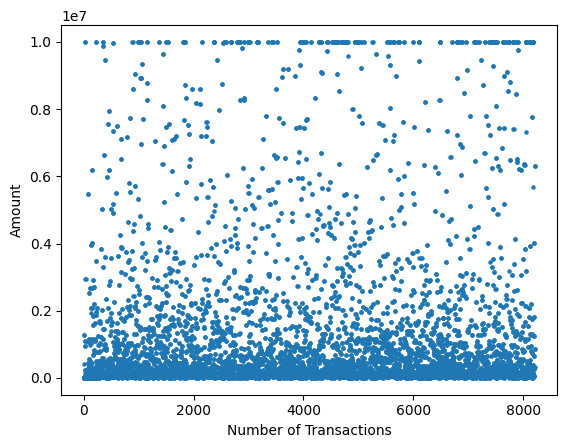

In [22]:
plt.scatter(P.index, P.amount, s= 5)
plt.xlabel('Number of Transactions', fontsize=10)
plt.ylabel('Amount', fontsize=10)

On analysing the data, we find that:
*  for 0-100 steps, there are 1190 fraudulent transactions.
*  for 100-200 steps, there are 1070 fraudulent transactions.
*  for 200-300 steps, there are 1155 fraudulent transactions.
*  for 300-400 steps, there are 1084 fraudulent transactions.
*  for 400-500 steps, there are 1100 fraudulent transactions.
*  for 500-600 steps, there are 1056 fraudulent transactions.
*  for 600-700 steps, there are 1128 fraudulent transactions.
*  for 700-743 steps, there are 496 fraudulent transactions

##### This shows that fraudulent transtions are distributed almost uniformly across the steps.

##### And the above graph reveals that maximum fraudulent transactions occur for amount range (0-400000 ) apporximately

#### Hence, Key Factors are:
*   Type
*   Amount
*   newbalanceOrig
*   newbalanceDest
*   oldbalanceOrig
*   oldbalanceDest

### 6.Do these factors make sense? If yes, How? If not, How not?

In [25]:
P[P['newbalanceOrig']== 0.0]
df[(df['oldbalanceOrg']-df['newbalanceOrig'] != df['amount']) & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
724,1,CASH_OUT,416001.33,C749981943,0.00,0.00,C667346055,102.00,9291619.62,1,0
1911,1,CASH_OUT,132842.64,C13692003,4499.08,0.00,C297927961,0.00,132842.64,1,0
14861,8,CASH_OUT,181728.11,C2102265902,0.00,0.00,C789014007,11397.00,184477.77,1,0
25875,8,TRANSFER,1078013.76,C1026280121,0.00,0.00,C277510102,0.00,970749.68,1,0
60853,9,TRANSFER,994453.20,C1121789613,1437370.87,442917.67,C254839817,194812.76,665743.67,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6357390,710,TRANSFER,10000000.00,C671111468,37418265.31,27418265.31,C1728836940,0.00,0.00,1,0
6362456,730,TRANSFER,10000000.00,C1277761503,37316255.05,27316255.05,C500987951,0.00,0.00,1,0
6362460,730,TRANSFER,10000000.00,C2140038573,17316255.05,17316255.05,C1395467927,0.00,0.00,1,1
6362462,730,TRANSFER,7316255.05,C1869569059,17316255.05,17316255.05,C1861208726,0.00,0.00,1,1


In [26]:
df[(df['oldbalanceDest']-df['newbalanceDest'] != df['amount']) & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [27]:
P[P['newbalanceOrig']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
2,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
3,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
4,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
8208,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
8209,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
8210,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
8211,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


* Type: Fraudulent transcations only occur under the types 'TRANSFER' & 'CASH_OUT'
* Amount: Majority fraudulent transactions occur for amount range (0 - 400000) apporximately
* newbalanceDest, oldbalanceDest: For  99.8051% Fraudulent Transactions, the difference between oldbalanceDest and       newbalanceDest does not equate to the amount transacted.
* newbalanceOrig : For 98.05% of Fradulent Transactions, newbalaceOrig = 0.0 .
  i.e. the entire account has been emptied. 

### 7. What kind of prevention should be adopted while company update its infrastructure

* Be extra vigil with transactions of type 'TRANSFER' & 'CASH-OUT' since at present all fradulent encounters occur under these two catagories. However, there are other factors to take care of as well, since fraudsters will surely upgrade their ways.

* Be careful with the amount range where maximum frauds are occuring.

* Look out for transactions where originating account is absolutely emptied at the end of transactions.

* Look out for transactions especially of type 'TRANSFER' &'CASHOUT' where the difference between oldbalanceDest and newbalanceDest does not equate to amount transacted.

* Continuously monitor transactions for suspicious behavior or unusual patterns. Assign risk scores to transactions based on factors such as transaction amount, frequency, location, and customer behavior. High-risk transactions can be flagged for further investigation or subjected to additional security checks.

* Encryption should be used to protect sensitive customer information stored in databases or transmitted over networks, making it harder for attackers to access or manipulate data.


### 8. Assuming these actions have been implemented, how would you determine if they work?

* Regular security checks should be conducted to assess the effectiveness of existing controls and identify vulnerabilities in systems and processes. 

* Strong password policies should be enforced for both customers and employees.

* An robust incident response plan should be developed and regularly updated that outlines the steps to be taken in case of a suspected or confirmed fraudulent transaction. 

* Employees should be vigilant for signs of suspicious activity and know how to respond appropriately.